# Deliverable #1: Retrieve Weather Data
FYI: Current Weather Data retrival step can be skipped if a previous Weather_Database.csv has been saved and you do not mind using older data (from July 23, 2022). Current Weather Data retrieval happens @ cell #6 for approximately 2,000 to 3,000 cities and saved to a csv in cell #8. If you want to just import the csv and not retrieve current weather info start @ cell #9.  


In [2]:
# required Python built-in modules
import datetime as dt
import time
import requests
import random
import os

# Third Party modules
import numpy as np
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
from scipy.stats import linregress


# local module
from config import weather_api_key


In [8]:
# Generate Latitudes, QTY: 10,000 
# Other local versions of this global variable will be lats, lat, lts, parallel
latitude = np.random.uniform(-90,90, size=10000)

# Generate Longitudes, QTY: 10,000
# Other local versions of this global variable will be long, lon, lng, meridian, 
longitude = np.random.uniform(-180,180, size=10000)

lat_long = list(zip(latitude, longitude))
lat_long[0]

(-50.44678251257173, 54.523501651905065)

In [9]:

cities = set()
for lat, long in lat_long:
    c = citipy.nearest_city(lat, long)
    if c not in cities:
        cities.add(c)#, c.country_code))
cities = list(cities)
cities[0]

In [10]:
# pd.DataFrame has: City, Country, Date, lat, lon, Max Temp, Humidity, Cloudiness, Wind Speed
city_data = []

# use the cities list to start the dataframe
for place in cities:
    p = dict()
    p['City'] = place.city_name.capitalize()
    p['Country'] = place.country_code.upper()
    city_data.append(p)    
    
city_df = pd.DataFrame(city_data)
city_df['Date'] = ''
city_df['Lat'] = ''
city_df['Lon'] = ''
city_df['Max Temp'] = ''
city_df['Humidity'] = ''
city_df['Cloudiness'] = ''
city_df['Wind Speed'] = ''
city_df['Description'] = ''
city_df


,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Description
0,Neiafu,TO,,,,,,,,
1,Tecoanapa,MX,,,,,,,,
2,Malwan,IN,,,,,,,,
3,Aasiaat,GL,,,,,,,,
4,Pangai,TO,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...
2331,Iskateley,RU,,,,,,,,
2332,Dunyapur,PK,,,,,,,,
2333,San ramon,BO,,,,,,,,
2334,Vydrino,RU,,,,,,,,


In [16]:
# retieve the weather information for each city and fill in the data
# Note: Open Weather API only allows 60 api calls per minute
params= {'APPID':weather_api_key,
        'q': 'Boston',
        'units':'Imperial'}

url = f"https://api.openweathermap.org/data/2.5/weather"

err_counter = 0 


for index in city_df.index:
    
    # Retrive the weather information for each city
    params['q'] = city_df['City'][index]
    response = requests.get(url, params).json()

    # Save the weather information for each city    
    try:
        city_df['Date'][index] = dt.datetime.utcfromtimestamp(response['dt']).strftime('%Y-%m-%d %H:%M:%S') 
        city_df['Lat'][index] = response['coord']['lat']
        city_df['Lon'][index] = response['coord']['lon']
        city_df['Max Temp'][index] = response['main']['temp_max']
        city_df['Humidity'][index] = response['main']['humidity']
        city_df['Wind Speed'][index] = response['wind']['speed']
        city_df['Description'][index] = response['weather'][0]['description']
        city_df['Cloudiness'][index] = response['clouds']['all']
    except KeyError:
        err_counter += 1
        
#   if statement to manage api call limits and provide status update
    if (index % 50 == 0):
        print(f"{index} Sleep Here  | |  404 HTTP Errors so far: {err_counter} of {city_df.shape[0]:,.0f} = {((err_counter/city_df.shape[0])*100):.2f}%")
        time.sleep(60)
    else: 
        pass

0 Sleep Here  | |  404 HTTP Errors so far: 0 of 2,336 = 0.00%
50 Sleep Here  | |  404 HTTP Errors so far: 7 of 2,336 = 0.30%
100 Sleep Here  | |  404 HTTP Errors so far: 10 of 2,336 = 0.43%
150 Sleep Here  | |  404 HTTP Errors so far: 13 of 2,336 = 0.56%
200 Sleep Here  | |  404 HTTP Errors so far: 16 of 2,336 = 0.68%
250 Sleep Here  | |  404 HTTP Errors so far: 16 of 2,336 = 0.68%
300 Sleep Here  | |  404 HTTP Errors so far: 20 of 2,336 = 0.86%
350 Sleep Here  | |  404 HTTP Errors so far: 21 of 2,336 = 0.90%
400 Sleep Here  | |  404 HTTP Errors so far: 23 of 2,336 = 0.98%
450 Sleep Here  | |  404 HTTP Errors so far: 27 of 2,336 = 1.16%
500 Sleep Here  | |  404 HTTP Errors so far: 30 of 2,336 = 1.28%
550 Sleep Here  | |  404 HTTP Errors so far: 38 of 2,336 = 1.63%
600 Sleep Here  | |  404 HTTP Errors so far: 41 of 2,336 = 1.76%
650 Sleep Here  | |  404 HTTP Errors so far: 43 of 2,336 = 1.84%
700 Sleep Here  | |  404 HTTP Errors so far: 46 of 2,336 = 1.97%
750 Sleep Here  | |  404 HTTP 

In [5]:
city_df = city_df.replace('', np.nan).dropna()
city_df = city_df.reset_index().drop('index', axis=1)
city_df

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Description
0,Neiafu,TO,2022-07-23 02:38:56,-18.6500,-173.9833,79.48,73.0,40.0,5.75,scattered clouds
1,Tecoanapa,MX,2022-07-23 02:43:40,16.5167,-98.7500,80.87,81.0,38.0,3.58,scattered clouds
2,Aasiaat,GL,2022-07-23 02:43:43,68.7098,-52.8699,39.29,99.0,100.0,5.17,light rain
3,Pangai,TO,2022-07-23 02:43:45,-19.8000,-174.3500,78.91,78.0,40.0,13.80,scattered clouds
4,Klaksvik,FO,2022-07-23 02:43:47,62.2266,-6.5890,49.12,82.0,100.0,6.46,overcast clouds
...,...,...,...,...,...,...,...,...,...,...
2149,Iskateley,RU,2022-07-23 04:41:15,67.6803,53.1512,54.12,90.0,99.0,10.45,overcast clouds
2150,Dunyapur,PK,2022-07-23 04:41:17,29.7995,71.7196,93.63,54.0,100.0,7.09,overcast clouds
2151,San ramon,BO,2022-07-23 04:37:05,37.7799,-121.9780,67.75,74.0,0.0,8.05,clear sky
2152,Vydrino,RU,2022-07-23 04:41:21,51.4850,104.8461,55.17,89.0,100.0,1.63,overcast clouds


In [18]:
cities_filepath = os.path.join('WeatherPy_Database.csv')
city_df.to_csv(cities_filepath)

In [4]:
# import csv of saved data, comment out if running the same day.
cities_filepath = os.path.join('WeatherPy_Database.csv')
city_df = pd.read_csv(cities_filepath).drop('Unnamed: 0', axis=1)
city_df

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Description
0,Neiafu,TO,2022-07-23 02:38:56,-18.6500,-173.9833,79.48,73.0,40.0,5.75,scattered clouds
1,Tecoanapa,MX,2022-07-23 02:43:40,16.5167,-98.7500,80.87,81.0,38.0,3.58,scattered clouds
2,Aasiaat,GL,2022-07-23 02:43:43,68.7098,-52.8699,39.29,99.0,100.0,5.17,light rain
3,Pangai,TO,2022-07-23 02:43:45,-19.8000,-174.3500,78.91,78.0,40.0,13.80,scattered clouds
4,Klaksvik,FO,2022-07-23 02:43:47,62.2266,-6.5890,49.12,82.0,100.0,6.46,overcast clouds
...,...,...,...,...,...,...,...,...,...,...
2165,Iskateley,RU,2022-07-23 04:41:15,67.6803,53.1512,54.12,90.0,99.0,10.45,overcast clouds
2166,Dunyapur,PK,2022-07-23 04:41:17,29.7995,71.7196,93.63,54.0,100.0,7.09,overcast clouds
2167,San ramon,BO,2022-07-23 04:37:05,37.7799,-121.9780,67.75,74.0,0.0,8.05,clear sky
2168,Vydrino,RU,2022-07-23 04:41:21,51.4850,104.8461,55.17,89.0,100.0,1.63,overcast clouds


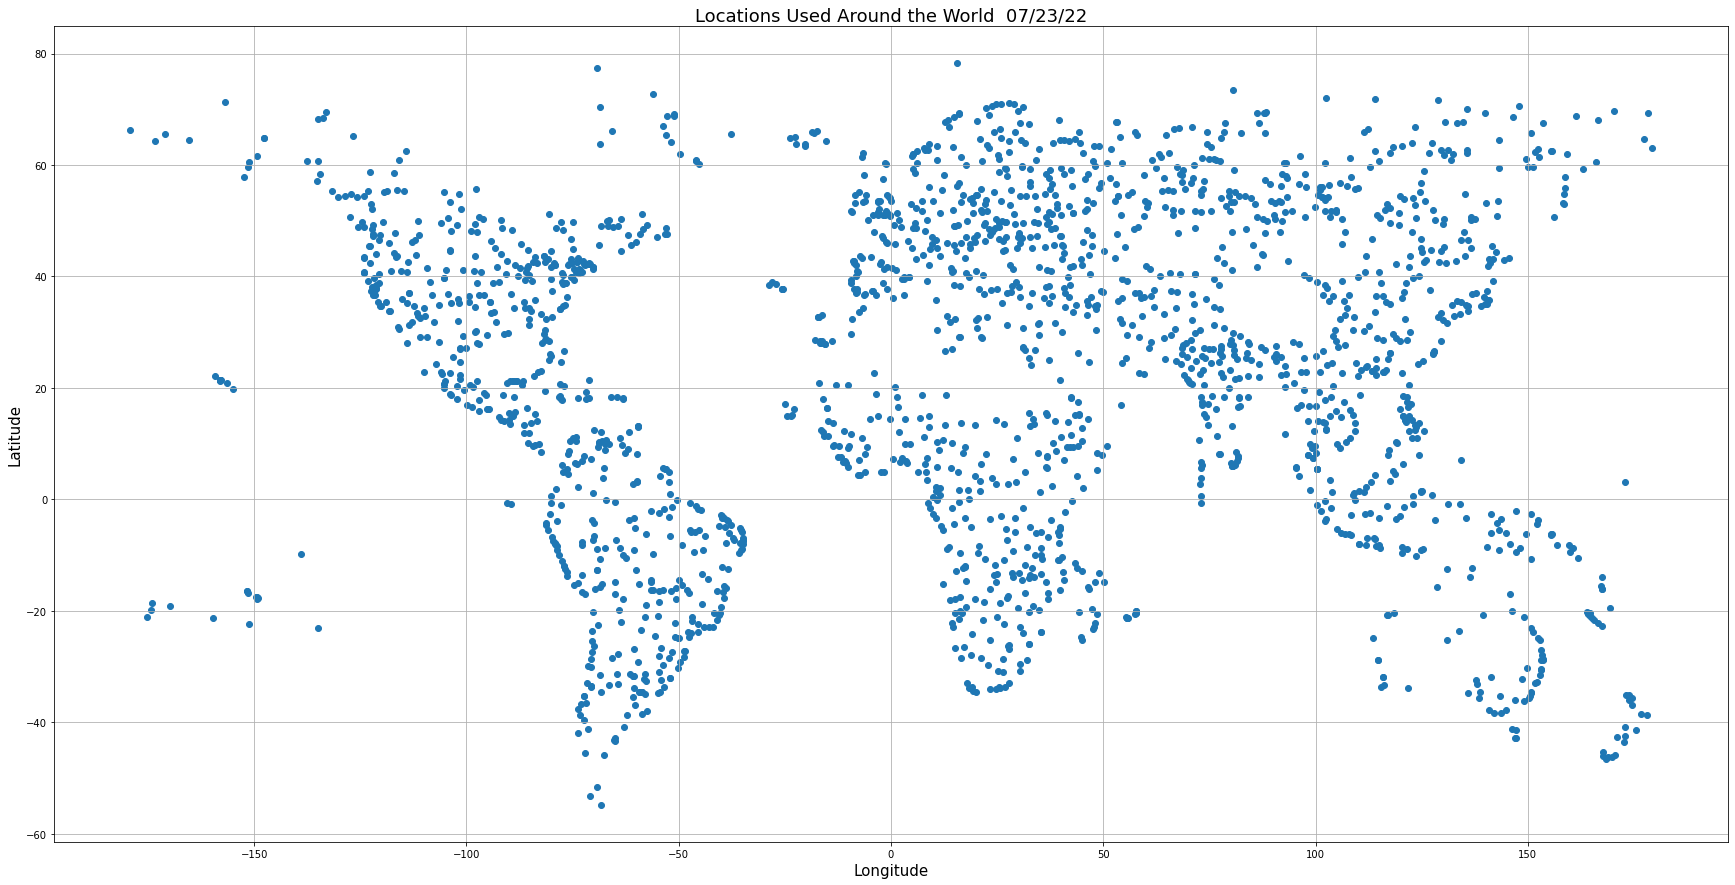

In [18]:
# plot the lat, lon to see how much of the world cities are used
fig, ax = plt.subplots(figsize=(30, 15))
ax.scatter(city_df['Lon'], city_df['Lat'])
ax.set_title("Locations Used Around the World  " + time.strftime('%x'), fontsize=18)
ax.set_ylabel('Latitude', fontsize=15)
ax.set_xlabel('Longitude', fontsize=15)
ax.grid(True)


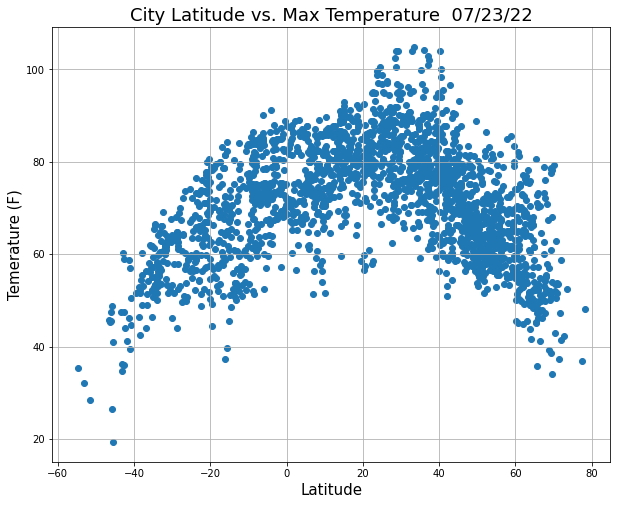

In [7]:
# Plot the Latitude compared to Max Temperature

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(city_df['Lat'], city_df['Max Temp'])
ax.set_title("City Latitude vs. Max Temperature  " + time.strftime('%x'), fontsize=18)
ax.set_ylabel('Temerature (F)', fontsize=15)
ax.set_xlabel('Latitude', fontsize=15)
ax.grid(True)

# if that does not show a better corrrelation than weatherPy.ipynb... Look at that arc, time to sort by n/s hemisphere. 

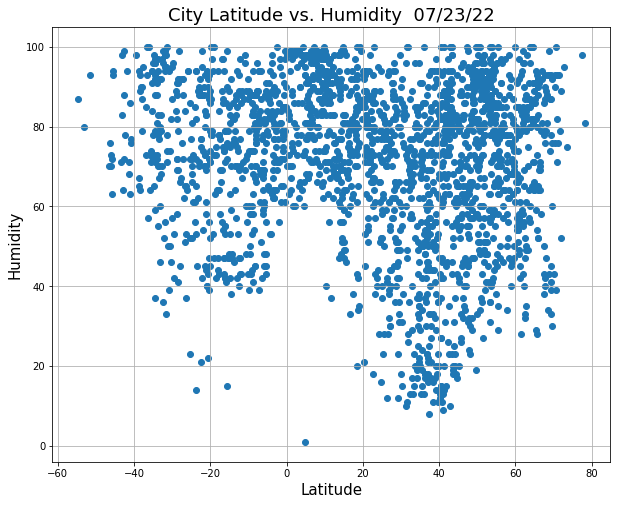

In [8]:
# Plot the Latitude compared to Humidity
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(city_df['Lat'], city_df['Humidity'])
ax1.set_title("City Latitude vs. Humidity  " + time.strftime('%x'), fontsize=18)
ax1.set_ylabel('Humidity', fontsize=15)
ax1.set_xlabel('Latitude', fontsize=15)
ax1.grid(True)

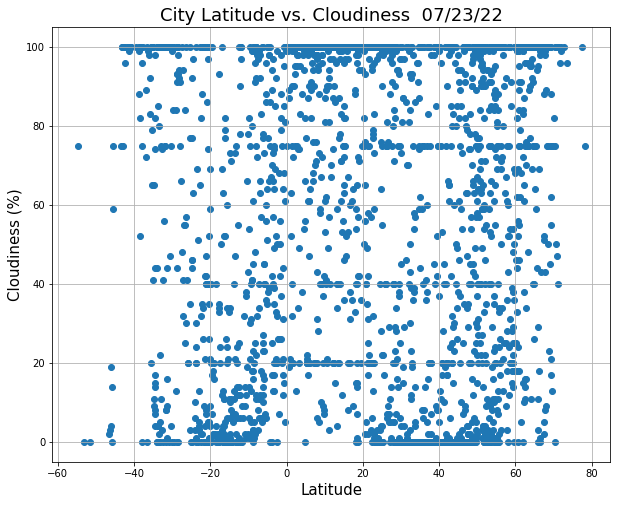

In [9]:
# Plot the Latitude compared to cloudiness
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(city_df['Lat'], city_df['Cloudiness'])
ax2.set_title("City Latitude vs. Cloudiness  " + time.strftime('%x'), fontsize=18)
ax2.set_ylabel('Cloudiness (%)', fontsize=15)
ax2.set_xlabel('Latitude', fontsize=15)
ax2.grid(True)

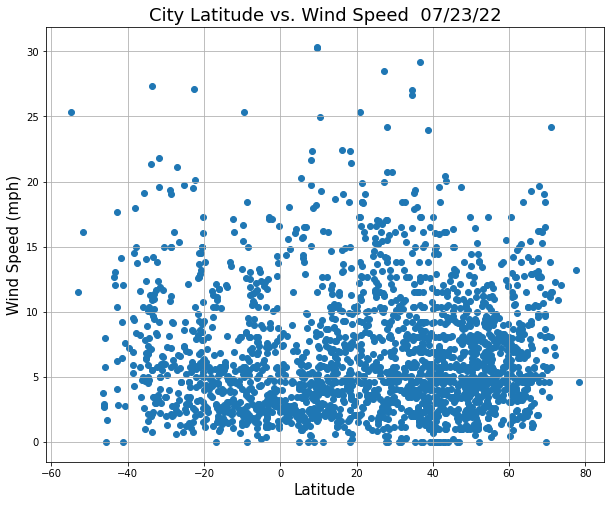

In [10]:
fig3, ax3 = plt.subplots(figsize=(10, 8))
ax3.scatter(city_df['Lat'], city_df['Wind Speed'])
ax3.set_title("City Latitude vs. Wind Speed  " + time.strftime('%x'), fontsize=18)
ax3.set_ylabel('Wind Speed (mph)', fontsize=15)
ax3.set_xlabel('Latitude', fontsize=15)
ax3.grid(True)

In [43]:
def plot_linier_regression(x_values, y_values, fig_size=(10, 8), grid=False, x_label='', y_label='', title='', label_fontsize=15, title_fontsize=18, eq_coord=tuple()):
    """ Plots a regression line with the scatter plot data using matplotlib.
    
    x_values (list or series, required) : 
    y_values (list or series, required) : 
    figsize  (tuple) :     Size of the graph: 2 integers in a tuple; default=(10, 8);  
                           tuple[0] = length of x axis, tuple[1] = length of y axis,  
    grid     (bool)  :     Turns the gridlines on; default = False 
    x_label  (str)   :     Label for the units of the x-axis; default = str()
    y_label  (str)   :     Label for the units of the Y-axis; default = str()
    title    (str)   :     Title for the graph; default = str()
    label_fontsize (str) : Font size of the axis labels; default = 15
    title_fontsize (str) : Font size of the graph title; default = 18
    eq_coord (tuple)   :   Location of Linier Regression Equation on the grid. 
                           default = (min(x_values)+5, min(y_values)+5); 2 integers in a tuple; 
                           tuple[0] = x coordinate, tuple[1] = y coordinate,  
    
    """
    if len(eq_coord) == 0:
        eq_coord = (min(x_values)+5, min(y_values)+5)
    else:
        pass
    
    # Regression Calculation
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    regress = [round((day * slope + intercept),2) for day in x_values]

    # graph
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(x_values, regress, label='Line of Regression')
    ax.scatter(x_values, y_values, color='gold', marker='o', label='Cities', edgecolor='green')
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_ylabel(y_label, fontsize=label_fontsize)
    ax.set_xlabel(x_label, fontsize=label_fontsize)
    ax.grid(grid)
    ax.legend()
    ax.annotate(equation, eq_coord, fontsize=label_fontsize, color='blue', )
    
    
    


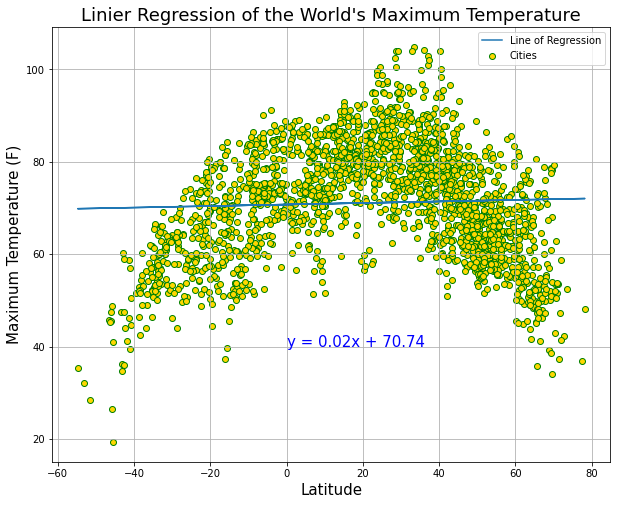

In [36]:
plot_linier_regression(city_df['Lat'], city_df['Max Temp'], x_label='Latitude', y_label ='Maximum Temperature (F)',grid =True, title="Linier Regression of the World's Maximum Temperature", eq_coord=(0,40))


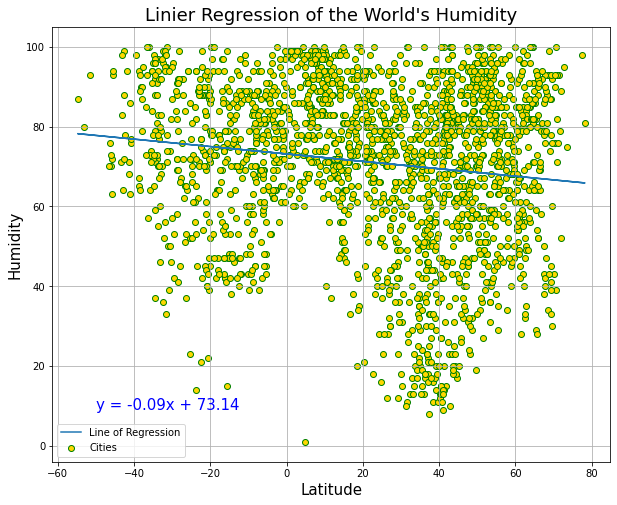

In [39]:
plot_linier_regression(city_df['Lat'], city_df['Humidity'], x_label='Latitude', y_label ='Humidity',grid =True, title="Linier Regression of the World's Humidity", eq_coord=(-50, 9)) 

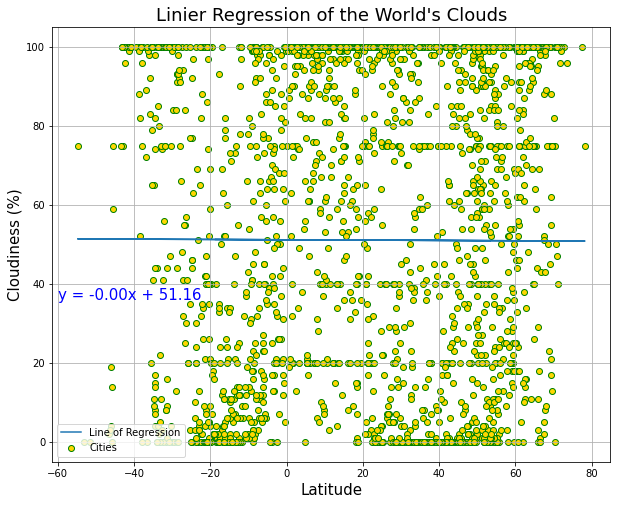

In [41]:
plot_linier_regression(city_df['Lat'], city_df['Cloudiness'], x_label='Latitude', y_label ='Cloudiness (%)',grid =True, title="Linier Regression of the World's Clouds", eq_coord=(-60,36)) 

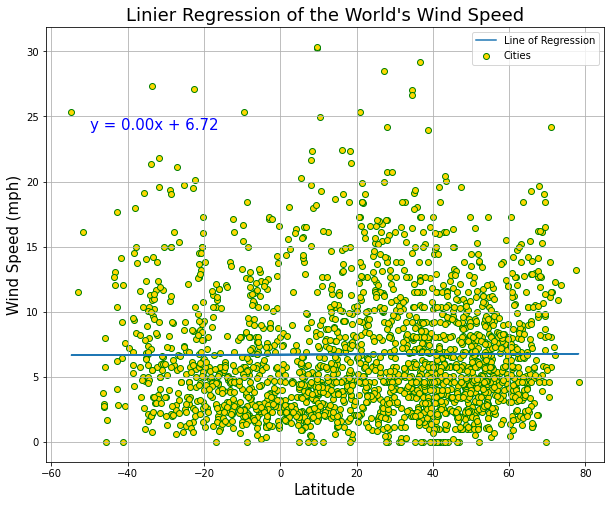

In [42]:
plot_linier_regression(city_df['Lat'], city_df['Wind Speed'], x_label='Latitude', y_label ='Wind Speed (mph)',grid =True, title="Linier Regression of the World's Wind Speed", eq_coord=(-50, 24)) 

In [23]:
north_df = city_df[city_df['Lat']>=0]
south_df = city_df[city_df['Lat']<=0]

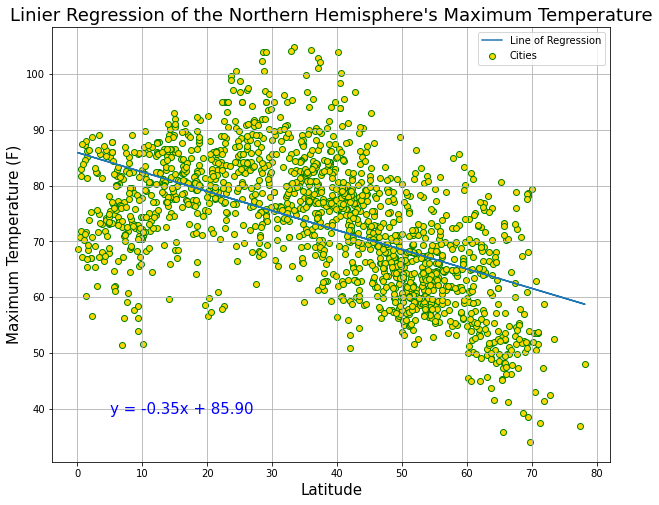

In [44]:
plot_linier_regression(north_df['Lat'], north_df['Max Temp'], x_label='Latitude', y_label ='Maximum Temperature (F)',grid =True, title="Linier Regression of the Northern Hemisphere's Maximum Temperature")

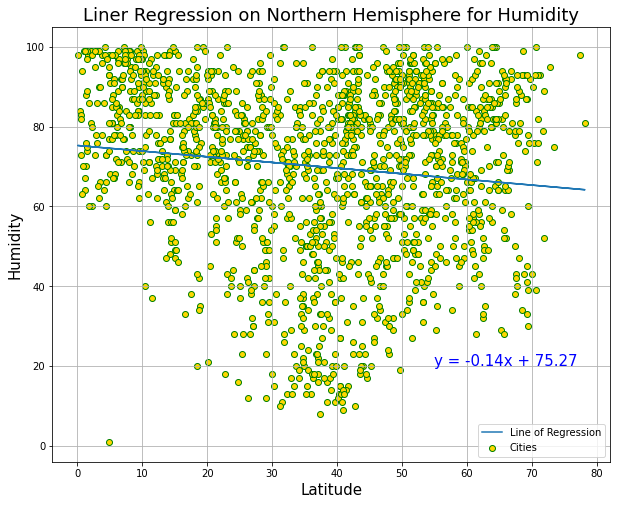

In [45]:
plot_linier_regression(north_df['Lat'], north_df['Humidity'], x_label='Latitude', y_label ='Humidity', grid =True, title="Liner Regression on Northern Hemisphere for Humidity", eq_coord=(55, 20))

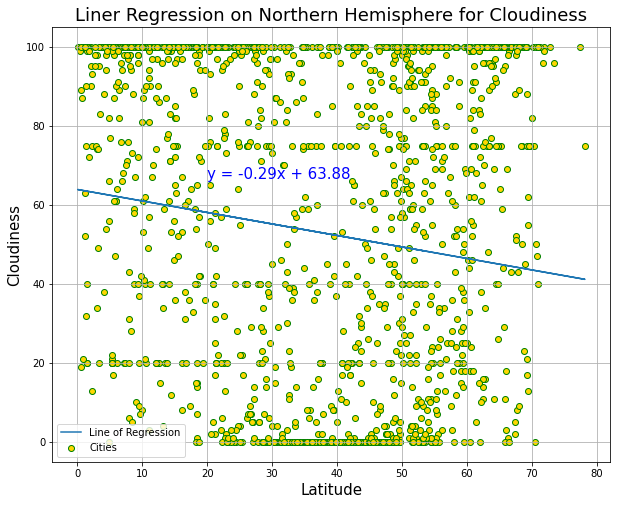

In [53]:
plot_linier_regression(north_df['Lat'], north_df['Cloudiness'], x_label='Latitude', y_label ='Cloudiness', grid =True, title="Liner Regression on Northern Hemisphere for Cloudiness", eq_coord=(20, 66.5))

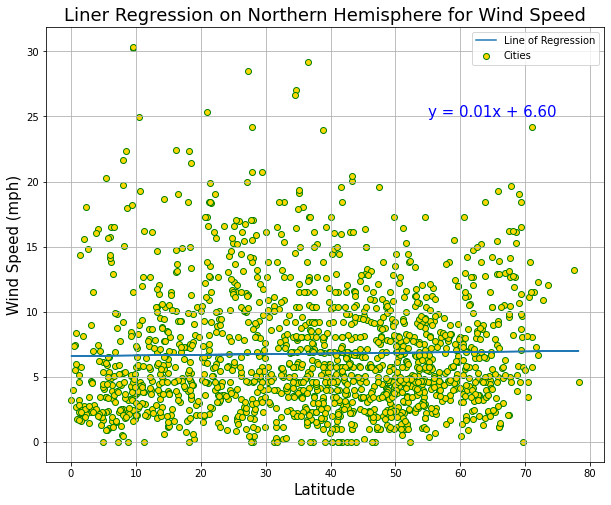

In [54]:

plot_linier_regression(north_df['Lat'], north_df['Wind Speed'], x_label='Latitude', y_label ='Wind Speed (mph)', grid =True, title="Liner Regression on Northern Hemisphere for Wind Speed", eq_coord=(55, 25))

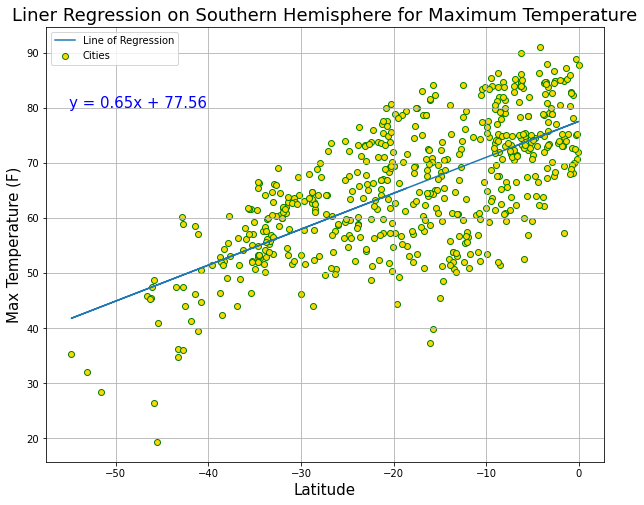

In [55]:
plot_linier_regression(south_df['Lat'], south_df['Max Temp'], x_label='Latitude', y_label ='Max Temperature (F)', grid =True, title="Liner Regression on Southern Hemisphere for Maximum Temperature", eq_coord=(-55, 80))

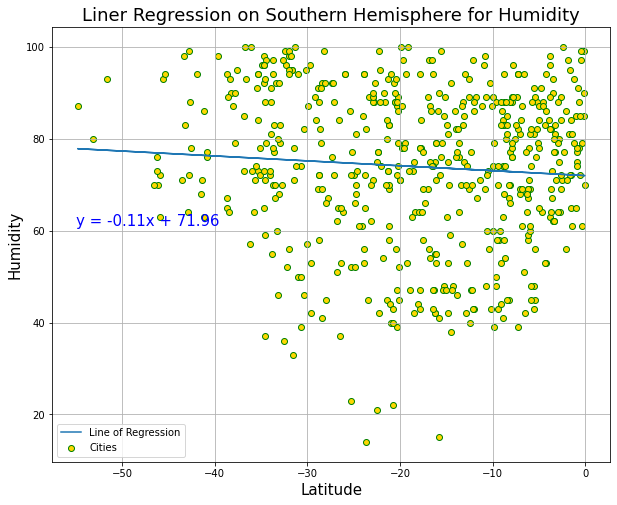

In [56]:
plot_linier_regression(south_df['Lat'], south_df['Humidity'], x_label='Latitude', y_label ='Humidity', grid =True, title="Liner Regression on Southern Hemisphere for Humidity", eq_coord=(-55, 61))

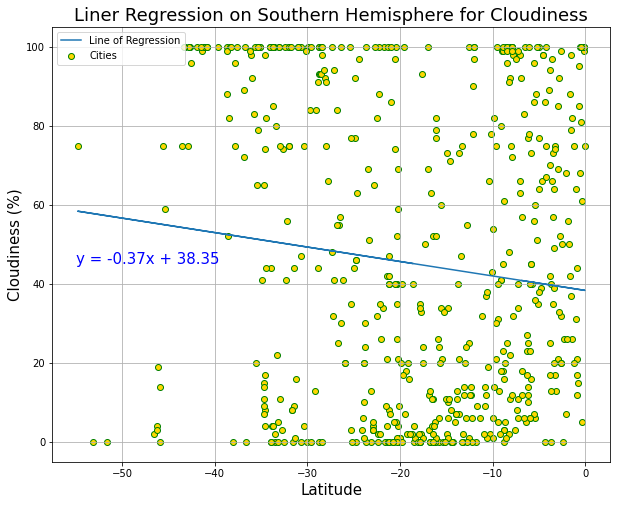

In [57]:
plot_linier_regression(south_df['Lat'], south_df['Cloudiness'], x_label='Latitude', y_label ='Cloudiness (%)', grid =True, title="Liner Regression on Southern Hemisphere for Cloudiness", eq_coord=(-55, 45))

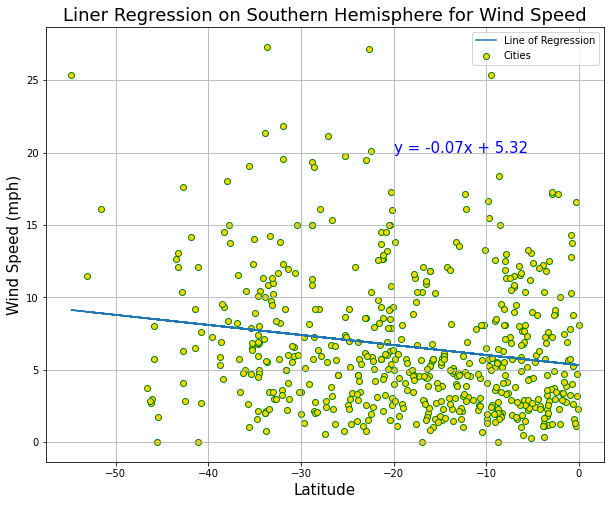

In [58]:
plot_linier_regression(south_df['Lat'], south_df['Wind Speed'], x_label='Latitude', y_label ='Wind Speed (mph)', grid =True, title="Liner Regression on Southern Hemisphere for Wind Speed", eq_coord=(-20, 20))

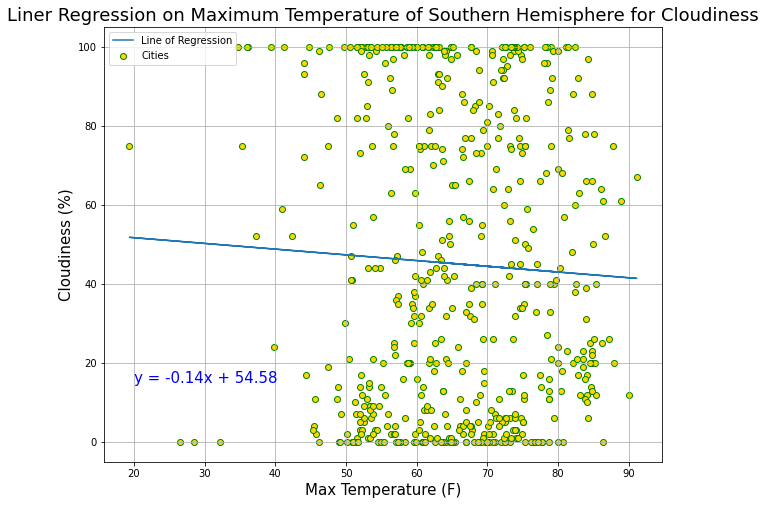

In [61]:
plot_linier_regression(south_df['Max Temp'], south_df['Cloudiness'], x_label='Max Temperature (F)', y_label ='Cloudiness (%)', grid =True, title="Liner Regression on Maximum Temperature of Southern Hemisphere for Cloudiness", eq_coord=(20, 15))

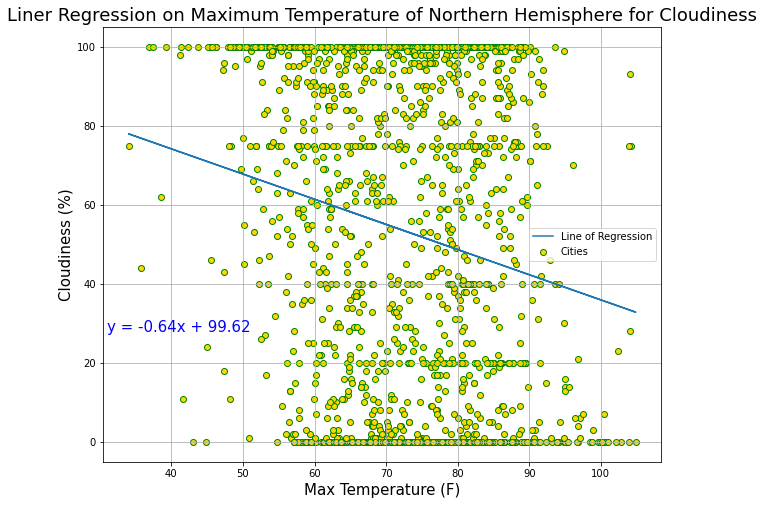

In [65]:
plot_linier_regression(north_df['Max Temp'], north_df['Cloudiness'], x_label='Max Temperature (F)', y_label ='Cloudiness (%)', grid =True, title="Liner Regression on Maximum Temperature of Northern Hemisphere for Cloudiness", eq_coord=(31, 28))